# Logistic Regression From Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd

In [2]:
# Generate linearly separable data
np.random.seed(0)
x0 = np.random.normal(loc=2, scale=1, size=(50, 2))
x1 = np.random.normal(loc=5, scale=1, size=(50, 2))

# Add some noise to make the classes not perfectly separable
x0[48:] += 4
x1[:2] -= 3

# Generate third feature
x0_third_feature = np.random.normal(loc=1, scale=0.5, size=(50,))
x1_third_feature = np.random.normal(loc=3, scale=0.5, size=(50,))

# Combine features into 3D points
x0 = np.hstack((x0, x0_third_feature.reshape(-1, 1)))
x1 = np.hstack((x1, x1_third_feature.reshape(-1, 1)))

# Create DataFrame
df_x0 = pd.DataFrame(x0, columns=['feature1', 'feature2', 'feature3'])
df_x1 = pd.DataFrame(x1, columns=['feature1', 'feature2', 'feature3'])

# Add target column
df_x0['target'] = 0
df_x1['target'] = 1

# Concatenate x1 and x2 DataFrames and shuffle
df = pd.concat([df_x0, df_x1], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle rows

# Display the DataFrame
df.head()

,feature1,feature2,feature3,target
0,3.999785,3.455229,3.768189,1
1,4.586381,4.252545,2.840336,1
2,3.508742,5.439392,3.199523,1
3,1.596823,3.222445,0.161998,0
4,0.929247,3.054452,0.845494,0


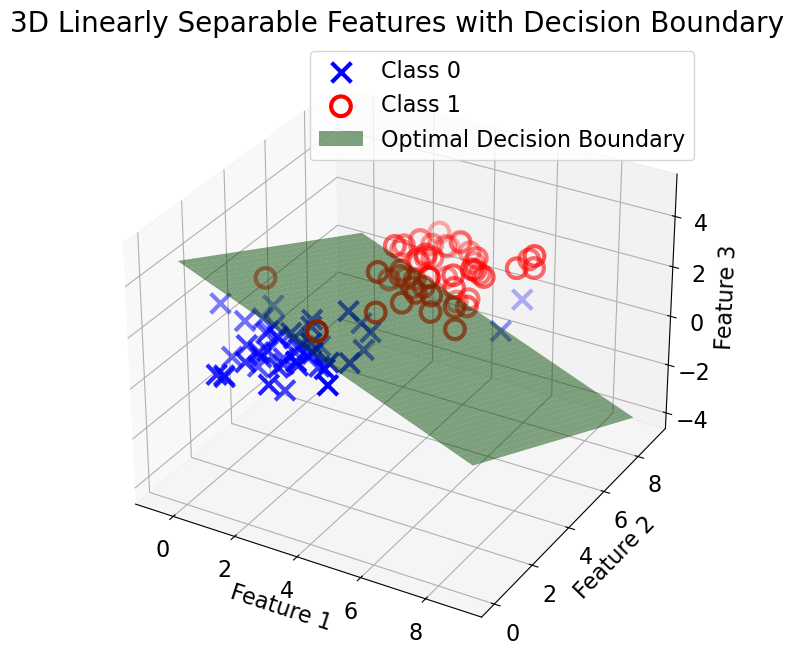

In [3]:
# Plot the data
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x0[:, 0], x0[:, 1], x0[:, 2], marker='x', color='blue', label='Class 0', s=200, linewidth=3)
ax.scatter(x1[:, 0], x1[:, 1], x1[:, 2], s=200, facecolors='none', edgecolors='r', label='Class 1', linewidth=3)

# Plot the separating plane
x_values = np.linspace(0, 9, 100)
y_values = np.linspace(0, 9, 100)
X, Y = np.meshgrid(x_values, y_values)
Z = 5 - 0.5 * X - 0.5 * Y
ax.plot_surface(X, Y, Z, color='green', alpha=0.5, label='Optimal Decision Boundary')

# Customize plot
ax.set_xlabel('Feature 1', fontsize=16)
ax.set_ylabel('Feature 2', fontsize=16)
ax.set_zlabel('Feature 3', fontsize=16)
ax.set_title('3D Linearly Separable Features with Decision Boundary', fontsize=20)
ax.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.tick_params(axis='z', which='major', labelsize=16)
# plt.tight_layout()

# Show plot
plt.grid(True)
plt.show()


In [4]:
# Preparing feature matrix
X = df.drop(columns='target').values.T
rows_X, columns_X = X.shape
print(f'Dimension of feature matrix X: {rows_X} x {columns_X}. ({rows_X} features and {columns_X} data points)')
total_features = rows_X

Dimension of feature matrix X: 3 x 100. (3 features and 100 data points)


In [5]:
# Preparing target vector
y = df[['target']].values.T
rows_y, columns_y = y.shape
print(f'Dimension of target vector y: {rows_y} x {columns_y}. ({rows_y} target variable(s) and {columns_y} data points)')

Dimension of target vector y: 1 x 100. (1 target variable(s) and 100 data points)


In [6]:
# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.2, random_state=2)
y_train = y_train.transpose()
y_test = y_test.transpose()

In [7]:
# Normalizing the feature matrix
mm = MinMaxScaler()
mm.fit(X_train)
X_train = mm.transform(X_train).transpose()
X_test = mm.transform(X_test).transpose()
total_training_datapoints = X_train.shape[1]

In [8]:
print('X_train shape (features x examples):', X_train.shape)
print('X_test shape (features x examples):', X_test.shape)
print("y_train shape (target variables x examples):", y_train.shape)
print("y_test shape(target variables x examples):", y_test.shape)

X_train shape (features x examples): (3, 80)
X_test shape (features x examples): (3, 20)
y_train shape (target variables x examples): (1, 80)
y_test shape(target variables x examples): (1, 20)


In [9]:
# Initializing Weight Vector and Bias
wT = np.random.randn(1, total_features)
b = 0
rows_wT, columns_wT = wT.shape
print(f'Dimension of transposed weight vector wT: {rows_wT} x {columns_wT}. ({rows_wT} target variable(s) and {columns_wT} features)')

Dimension of transposed weight vector wT: 1 x 3. (1 target variable(s) and 3 features)


In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Reinitializing Weight Vector and Bias
wT = np.random.randn(1, total_features)
b =  0
inv_total_training_data_points = 1/total_training_datapoints
dL_by_dwT = np.zeros((1, total_features))
dL_by_db = 0
alpha = 1
L_history = []
iteration = 0
total_iterations = 500
while iteration < total_iterations:
    iteration +=1 
    z = np.matmul(wT, X_train) + b
    sigma = sigmoid(z)
    l = sigma.copy()        # log likelihood
    condition_mask = y_train == 1
    l[condition_mask] = np.log(l[condition_mask])
    l[~condition_mask] = np.log(1-l[~condition_mask])
    L = -np.sum(l, axis=1)[0]
    L *= inv_total_training_data_points
    diff = sigma - y_train
    diff_X_train = np.multiply(diff, X_train)
    dL_by_dwT = inv_total_training_data_points * np.sum(diff_X_train, axis=1)
    dL_by_db = inv_total_training_data_points * np.sum(diff, axis=1)
    print(f'Iteration #{iteration}')
    print(f'Loss (Binary Cross Entropy): {L}\n')
    L_history.append(L)
    # Updation
    wT -= alpha * dL_by_dwT
    b -= alpha * dL_by_db

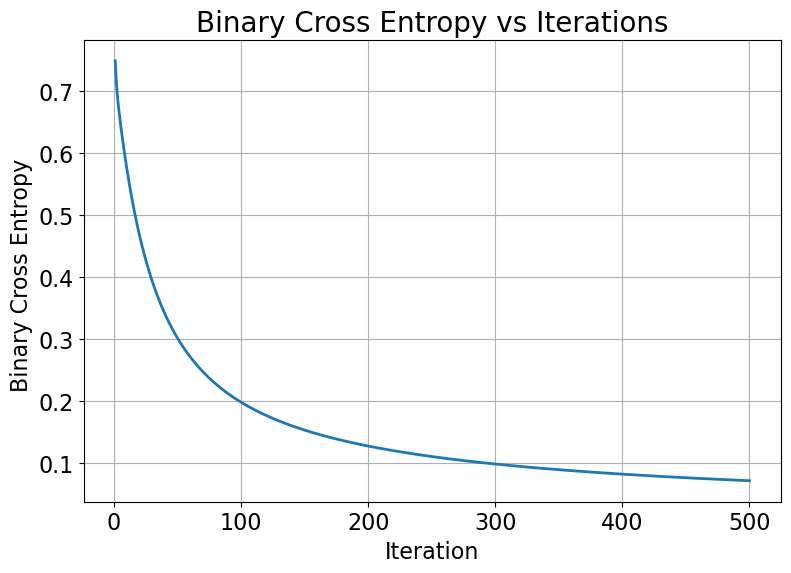

In [20]:
iterations = np.arange(1, len(L_history)+1)
plt.figure(figsize=(9, 6))
plt.plot(iterations, L_history, linewidth=2)
plt.title('Binary Cross Entropy vs Iterations', fontsize=20)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Binary Cross Entropy ', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

In [13]:
# Calculating Accuracy on test set
sigma_test = sigmoid(np.matmul(wT, X_test) + b)
wrong_decisions = np.sum( ((sigma_test <= 0.5) & (y_test == 1)) | ((sigma_test > 0.5) & (y_test == 0)) )
total_test_examples = y_test.shape[1]
accuracy = (total_test_examples-wrong_decisions)/total_test_examples * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f'Wrong decisions: {wrong_decisions}/{total_test_examples}')

Accuracy: 100.00%
Wrong decisions: 0/20


In [15]:
y_pred = sigma_test.copy()
condition_mask = y_pred > 0.5
y_pred[condition_mask] = 1
y_pred[~condition_mask] = 0

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test.T, y_pred.T)
print('Confusion Matrix:\n', cm, '\n')
print('True negative (Actually negative, classified as negative):', cm[0][0])
print('False positive (Actually negative, classified as positive):', cm[0][1])
print('False negative (Actually positive, classified as negative):', cm[1][0])
print('True positive (Actually positive, classified as positive):', cm[1][1])

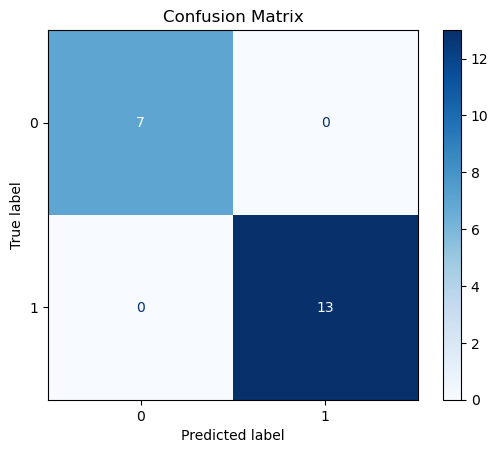

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Generating classification report from scikit-learn
cr = classification_report(y_test.T, y_pred.T)
print('Classification Report\n\n', cr)

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

